# MSIS522 Lab 1

## Introduction to Pandas

pandas is designed to make it easier to work with structured data. Most of the analyses you might perform will likely involve using tabular data, e.g., from .csv files or relational databases (e.g., SQL). The pandas name itself is derived from panel data, an econometrics term for multidimensional structured data sets, and Python data analysis itself. In this notebook, we will go through some examples to get you familiar with the pandas package.

In [ ]:
# import pandas using the conventional abbreviation
import numpy as np
import pandas as pd

### Series and DataFrame in Pandas
There are two fundamental data structures in Pandas:
- Series: a one-dimensional array of indexed data. (the equivalent of _vector_ in R)
- DataFrame: a two-dimensional array of indexed data. (the equivalent of _data frame_ in R)

We can create pandas series and dataframes from raw data as follows.

In [ ]:
# create a pandas series
s = pd.Series([0.25, 0.5, 0.75, 1.0], index=['a', 'b', 'c', 'd'])
print("This is a pandas series:")
display(s)

# you can access the number in a pandas series using either the labelled index or the integer index.
print("Access the first number with labelled index: {0} and with integer index: {1}".format(s['a'], s[0]))

# create a pandas dataframe
df = pd.DataFrame({
    'value': [0.25, 0.5, 0.75, 1.0],
    'label': ['A', 'B', 'C', 'D']
})
print("This is a pandas dataframe:")
display(df)

df1 = pd.DataFrame({'x': s, 'y': s})
print("This is another pandas dataframe:")
display(df1)

#### Task 1

In [ ]:
np.random.seed(0)  # seed for reproducibility

feature = np.random.randint(10, size=6)
label = np.array(['p', 'n', 'n', 'p', 'n', 'n'])
row_index = np.array(['a', 'b', 'c', 'd', 'e', 'f'])


# TODO: Create a dataframe from feature and label below with proper row index and col index.
df2 = pd.DataFrame({
    'feature': feature,
    'label': label}, 
    index=row_index
)
display(df2)

### Basic properties of a series or dataframe

In [ ]:
# basis properties of a series
print("Length of the series: {}".format(len(s)))
print("Index names of the series: {}".format(list(s.index)))

# basis properties of a dataframe
print("Column names of the dataframe: {}".format(list(df.columns)))
print("Index names of the dataframe: {}".format(list(df.index)))
print("Number of dimensions of the dataframe: {}".format(df.ndim))
print("Shape of the dataframe: {}".format(df.shape))

# statistics of a numerical data column
display(df2['feature'].describe())

# frequency of a categorical data column
display(df2['label'].value_counts())


### Loading data into a Dataframe from text file

In [ ]:
# read a csv file
pop = pd.read_csv('https://raw.githubusercontent.com/zariable/data/master/state-population.csv')
display(pop.head())

# rename
pop.rename(columns={"state/region": "state"}, inplace=True)
display(pop.head())

### Data indexing, slicing and filtering
To address a subset of data in a dataframe, we can use either [loc](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.loc.html) or [iloc](https://pandas.pydata.org/pandas-docs/version/0.17.0/generated/pandas.DataFrame.iloc.html) functions in pandas API.
- loc: Access a group of rows and columns by label(s) or a boolean array.
- iloc: Purely integer-location based indexing for selection by position.

In [ ]:
# indexing & slicing using index and column names
display(pop.loc[2, ['state', 'population']])
display(pop.loc[1:4, ['state', 'population']])

# indexing & slicing using index and column integer indices
display(pop.iloc[:3, :3])

pop_age_year = pop.loc[:, ['ages', 'population']]
display(pop_age_year.head())

# filtering
pop_2012 = pop.loc[pop['year'] == 2012, :]
display(pop_2012.head())

# filtering on multiple columns
pop_2012_total = pop.loc[(pop['year'] == 2012) & (pop['ages'] == 'total'), :]
display(pop_2012_total.head())

# filtering and slicing
pop_2012_total_2 = pop.loc[(pop['year'] == 2012) & (pop['ages'] == 'total'), ['state', 'population']]
display(pop_2012_total_2.head())

#### Task 2

In [ ]:
# TODO: Find the total population for WA in year 2010.
pop.loc[(pop['year'] == 2010) & (pop['ages'] == 'total') & (pop['state'] == 'WA'), :]

In [ ]:
# TODO: Calculate the median of population for all age groups across all states in 2010.
pop_2010_all = pop.loc[(pop['year'] == 2010) & (pop['ages'] == 'total'), :]
pop_2010_all['population'].median()

### Sorting dataframe

In [ ]:
# find the state with the largest population
pop_2012 = pop.loc[(pop['ages'] == 'total') & (pop['year'] == 2012) & (pop['state'] != 'USA'),:]
display(pop_2012.sort_values('population', ascending=False).head(10))

#### Task 3

In [ ]:
# Find the 10th largest city in terms of population in 2010 based on age < 18.
pop_2010_a18 = pop.loc[(pop['year'] == 2010) & (pop['ages'] == 'under18'), :]
pop_2010_a18_sorted = pop_2010_a18.sort_values('population', ascending=False)
# display(pop_2010_a18_sorted)

pop_2010_a18_sorted.iloc[9, :]

### Join multiple dataframes

In [ ]:
# Join pop dataframe with abbrevs and areas dataframes to find the areas for each state.
areas = pd.read_csv('https://raw.githubusercontent.com/zariable/data/master/state-areas.csv')
areas.rename(columns={'area (sq. mi)': 'area'}, inplace=True)
display(areas.head())

abbrevs = pd.read_csv('https://raw.githubusercontent.com/zariable/data/master/state-abbrevs.csv')
display(abbrevs.head())

pop.rename(columns={'state': 'abbreviation'}, inplace=True)
pop_abbrevs_areas = pd.merge(pd.merge(pop, abbrevs), areas)

display(pop_abbrevs_areas.head())

### Data aggregation

In [ ]:
# aggregate over a particular column
display(pop_abbrevs_areas.groupby('year')['population'].sum().head())

# different aggregations over different columns
display(pop_abbrevs_areas.groupby('year').aggregate({
    'population': ['mean', 'std'],
    'area': ['max', 'min']}).head()
)

#### Task 4

In [ ]:
# TODO: Get the min, max, mean and median of the population between 1990 and 2010 based on age group < 18.
df3 = pop_abbrevs_areas.loc[(pop_abbrevs_areas['year'].isin(np.arange(1990, 2010))) 
                            & (pop_abbrevs_areas['ages'] == "under18"), :]

df3.groupby('year').aggregate({
 'population': ['min', 'max', 'mean', 'median']   
})

## Case Study: Customer Churn

Customer attrition, also known as customer churn, customer turnover, or customer defection, is the loss of clients or customers.

Telephone service companies, Internet service providers, pay TV companies, insurance firms, and alarm monitoring services, often use customer attrition analysis and customer attrition rates as one of their key business metrics because the cost of retaining an existing customer is far less than acquiring a new one. Companies from these sectors often have customer service branches which attempt to win back defecting clients, because recovered long-term customers can be worth much more to a company than newly recruited clients.

In this case study, we will apply exploratory data Analysis and build a machine learning model to predict customer churn by assessing their propensity of risk to churn. Since these models generate a small prioritized list of potential defectors, they are effective at focusing customer retention marketing programs on the subset of the customer base who are most vulnerable to churn.

In [1]:
# importing libraries
import os
import io
import warnings

import numpy as np
import scipy as sp
import pandas as pd
import sklearn as sk

import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

warnings.simplefilter(action='ignore', category=FutureWarning)

### Data Overview

load the data and take a peek at the data
Each row represents a unique costumer, while the columns contains information about customer’s services, account, demographic and etc. The data set includes information about:

- Column **Churn**: Customers who left within the last month.
- Customer **Services** that one has signed up for: phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies.
- Customer **Account** information: how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges.
- Customer **Demographic** information:gender, age range, and if they have partners and dependents.

In [2]:
# load data from CSV file
df = pd.read_csv("https://raw.githubusercontent.com/zariable/data/master/telco_customer_churn.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
print("Rows     : ", df.shape[0])
print("Columns  : ", df.shape[1])
print("\nFeatures : \n", list(df.columns))
print("\nMissing values :  ", df.isnull().sum().values.sum())
print("\nUnique values :  \n", df.nunique())


Rows     :  7043
Columns  :  21

Features : 
 ['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn']

Missing values :   0

Unique values :  
 customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64


### Exploratory Data Analysis

#### Impute missing values

There are eleven missing values in "TotalCharges" for some of the customers with zero tenure. We can impute these values with zero as these customers probably haven't paid any bills yet.

In [4]:
df['TotalCharges'] = df['TotalCharges'].replace(" ", 0).astype('float')
 
# TODO: create a new column 'churn_rate' where the value is 1 if Churn equals Yes and 0 ow.
df['churn_rate'] = df['Churn'].replace("No", 0).replace("Yes", 1)

#### Target variable: Churn

CHURN columns tells us about the number of Customers who left within the last month.

    Churn: No - 73%
    Churn: Yes - 27%


No     5174
Yes    1869
Name: Churn, dtype: int64


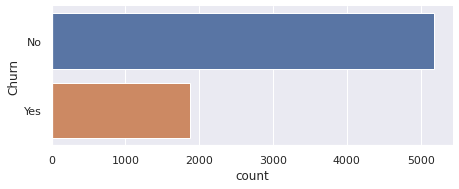

In [5]:
print(df['Churn'].value_counts())
ax = sns.catplot(y='Churn', kind='count', data=df, height=2.5, aspect=2.5, orient='h')

#### Numerical features

There are only three numerical columns: tenure, monthly charges and total charges. The probability density distribution can be estimate using the seaborn kdeplot function.


count    7043.000000
mean       32.371149
std        24.559481
min         0.000000
25%         9.000000
50%        29.000000
75%        55.000000
max        72.000000
Name: tenure, dtype: float64

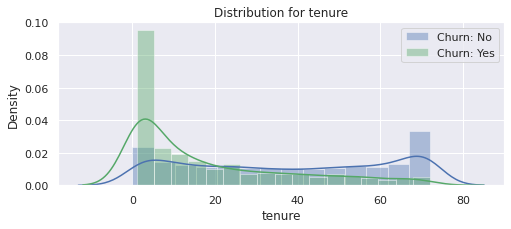

count    7043.000000
mean       64.761692
std        30.090047
min        18.250000
25%        35.500000
50%        70.350000
75%        89.850000
max       118.750000
Name: MonthlyCharges, dtype: float64

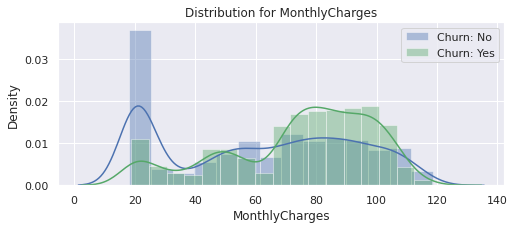

In [6]:
def distplot(feature, frame):
    plt.figure(figsize=(8,3))
    plt.title("Distribution for {}".format(feature))
    ax0 = sns.distplot(frame[frame['Churn'] == 'No'][feature], color= 'b', label='Churn: No')
    ax1 = sns.distplot(frame[frame['Churn'] == 'Yes'][feature], color= 'g', label='Churn: Yes')
    plt.legend()
    plt.show()

numerical_cols = ['tenure', 'MonthlyCharges']

# show the statistics of column tenure and use distplot to plot the Distribution of tenure for Churn and Non-churn users.
display(df['tenure'].describe())
distplot('tenure', df)

# TODO: apply the same analysis above to examine column MonthlyCharges
display(df['MonthlyCharges'].describe())
distplot('MonthlyCharges', df)


From the plots above we can conclude that:

- Clients with very short tenure are very likely to churn.
- Clients with higher monthly charges are more likely to churn.
- Tenure and monthly charges are probably important features.

Use scatter plot to check the distribution of customers based on both tenure and monthly charge. 

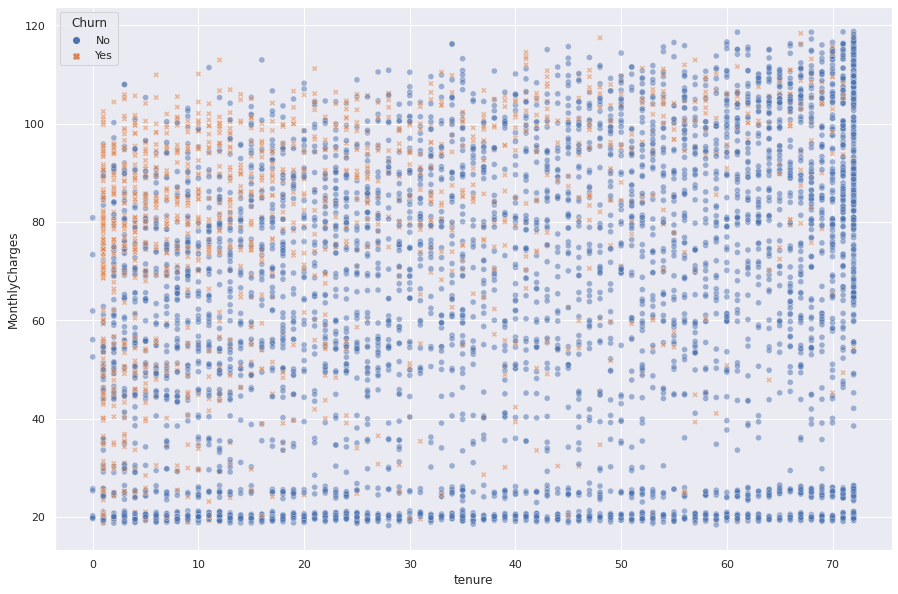

In [7]:
fig = plt.gcf()
fig.set_size_inches(15, 10)
ax = sns.scatterplot(x='tenure', y='MonthlyCharges', hue='Churn', style='Churn', alpha=0.5, data=df)

#### Categorical features

This dataset has 16 categorical features. We will examine some of them to see if they are correlated with the target variable (churn rate).

##### Contract

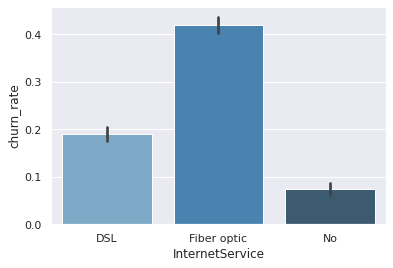

In [8]:
# sns.barplot("Contract", "churn_rate", palette = "Blues_d", order= ['Month-to-month', 'One year', 'Two year'], data=df)

# TODO: apply the same analysis to InternetService 
df.InternetService.unique()
sns.barplot("InternetService", "churn_rate", palette = "Blues_d", order= ['DSL', 'Fiber optic', 'No'], data=df)

##### Partner and dependents

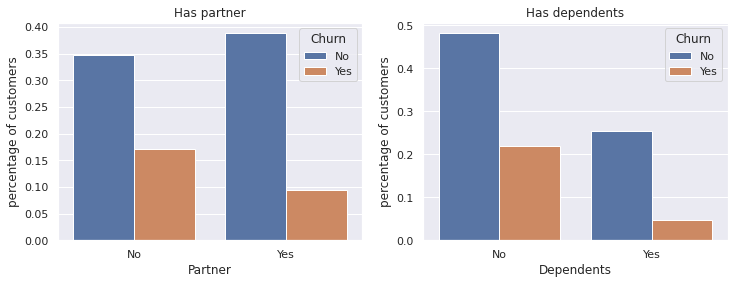

In [9]:
fig, axis = plt.subplots(1, 2, figsize=(12,4))
axis[0].set_title("Has partner")
axis[1].set_title("Has dependents")
axis_y = "percentage of customers"
# Plot Partner column
gp_partner = df.groupby('Partner')["Churn"].value_counts()/len(df)
gp_partner = gp_partner.to_frame().rename({"Churn": axis_y}, axis=1).reset_index()
ax = sns.barplot(x='Partner', y= axis_y, hue='Churn', data=gp_partner, ax=axis[0])
# Plot Dependents column
gp_dep = df.groupby('Dependents')["Churn"].value_counts()/len(df)
gp_dep = gp_dep.to_frame().rename({"Churn": axis_y}, axis=1).reset_index()
ax = sns.barplot(x='Dependents', y= axis_y, hue='Churn', data=gp_dep, ax=axis[1])

#### Correlation between feature and target variable

We can use Correlation heatmap to visualize the correlation between features as well as feature and target variable.

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
gender,1.000000,-0.001874,0.001808,0.010517,-0.000013,-0.006488,-0.009451,-0.000863,-0.003429,0.012230,0.005092,0.000985,0.001156,-0.000191,0.000126,0.011754,-0.005209,-0.008072,-0.012302,-0.008612
SeniorCitizen,-0.001874,1.000000,-0.016479,-0.211185,0.010834,0.008576,0.113791,-0.032310,-0.210897,-0.144828,-0.157095,-0.223770,-0.130130,-0.120802,-0.142554,-0.156530,-0.093704,0.049649,0.023880,0.150889
Partner,0.001808,-0.016479,1.000000,-0.452676,-0.101985,-0.017706,-0.117307,-0.000891,-0.081850,0.090753,-0.094451,-0.069072,-0.080127,-0.075779,-0.294806,-0.014877,-0.133115,-0.036054,-0.042628,0.150448
Dependents,0.010517,-0.211185,-0.452676,1.000000,0.048514,-0.001762,-0.019657,0.044590,0.190523,0.062775,0.156439,0.180832,0.140395,0.125820,0.243187,0.111377,0.123844,-0.029390,0.006300,-0.164221
tenure,-0.000013,0.010834,-0.101985,0.048514,1.000000,-0.018799,0.063510,-0.012008,0.017083,-0.064613,0.037174,0.033108,0.027090,0.031491,0.122446,-0.011129,0.075379,0.041647,0.108142,-0.144351
PhoneService,-0.006488,0.008576,-0.017706,-0.001762,-0.018799,1.000000,0.675070,0.387436,0.125353,0.129770,0.138755,0.123350,0.171538,0.165205,0.002247,-0.016505,-0.004070,-0.141829,-0.029806,0.011942
MultipleLines,-0.009451,0.113791,-0.117307,-0.019657,0.063510,0.675070,1.000000,0.186826,-0.066844,-0.130619,-0.013069,-0.066684,0.030195,0.028187,0.083343,-0.133255,0.025676,0.024338,0.015373,0.036310
InternetService,-0.000863,-0.032310,-0.000891,0.044590,-0.012008,0.387436,0.186826,1.000000,0.607788,0.650962,0.662957,0.609795,0.712890,0.709020,0.099721,0.138625,0.008124,-0.289963,-0.038247,-0.047291
OnlineSecurity,-0.003429,-0.210897,-0.081850,0.190523,0.017083,0.125353,-0.066844,0.607788,1.000000,0.621739,0.749040,0.791225,0.701976,0.704984,0.389978,0.334003,0.213800,-0.220566,-0.026788,-0.332819
OnlineBackup,0.012230,-0.144828,0.090753,0.062775,-0.064613,0.129770,-0.130619,0.650962,0.621739,1.000000,0.601503,0.617003,0.604117,0.606863,0.035407,0.260715,0.003183,-0.284344,-0.054537,-0.074205


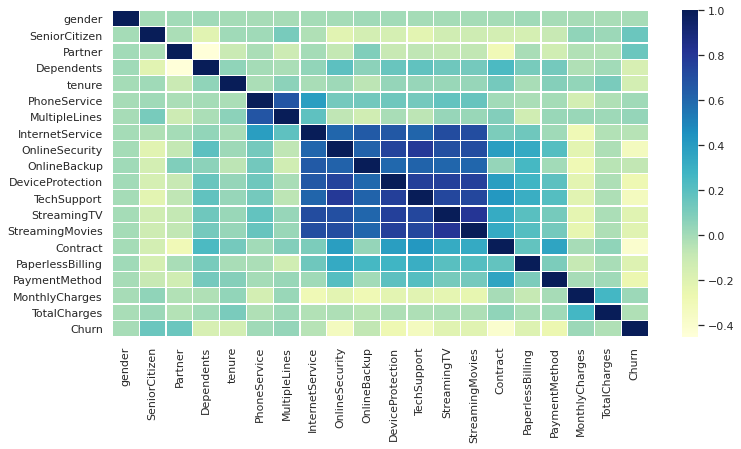

In [10]:
plt.figure(figsize=(12, 6))
corr = df[['gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn']].apply(lambda x: pd.factorize(x)[0]).corr()
display(corr)
ax = sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, linewidths=.2, cmap="YlGnBu")

# End of MSIS522 Lab 1
